# PAN (permanent account number) Card Tampering Detection

The purpose of this project is to detect tampering of PAN card using computer vision. This project will help different organization in detecting whether the Id i.e. the PAN card provided to them by thier employees or customers or anyone is original or not.

For this project we will calculate structural similarity of original PAN card and the PAN card uploaded by user.





# resumen 
- se utilizara la computer vision para evaluar el grado la similitud entre 2 imagenes, mediante 2 medidas:
  - indice de similaridad estructural
  - imagen blanco y negro que muestre las zonas donde las imagenes tieene mas parecido y mas diferencia 
teniendo esta informacaion ademas de dar un porcentaje de similiaridad tambien podremos crear un cuadrado para indicar en que zona de las imagenes es donde se parecen mas.  

## funciones usadas 

### (score, imagen_diferencias) = structural_similarity(img_1, img_2, full=True)
structural_similaritynos regreasara el indice de similarirdad entre 2 imagenes y una imagen que muestre las zonas con similaridad y difernecia 

### thresh = cv2.threshold
es un filtro que crea un umbral en la imagen resaltando los bordes y eliminando el ruido. se uso para que findconturs funcione mejor 

### contornos, jerarquia = cv2.findContours(image, mode, method)
regresa los contronos de objetos que se detecten en la imagen.

### (x, y, w, h) = cv2.boundingRect(img_to_find_rectangle)
apartir d euna figura irregular crea un rectangulo que lo encierre. le pasamos los contonos para que cree una rectangulo

### cv2.rectangle 
duibuja un rectangulo sobre una imagen


# 1 libraries

In [ ]:
# import the necessary packages

from skimage.metrics import structural_similarity # will find strutural similarities between 2 images 

import imutils
import cv2
from PIL import Image
import requests # fetch data from URL 


import cv2
from google.colab.patches import cv2_imshow # nos permite usar la funcion sin problemas 



In [ ]:
# create 2 dyr 
!mkdir pan_card_tampering
!mkdir pan_card_tampering/image

mkdir: cannot create directory ‘pan_card_tampering’: File exists
mkdir: cannot create directory ‘pan_card_tampering/image’: File exists


# 2 download data 

In [ ]:
# download and Open image and display
original = Image.open(requests.get('https://www.thestatesman.com/wp-content/uploads/2019/07/pan-card.jpg', stream=True).raw)
tampered = Image.open(requests.get('https://assets1.cleartax-cdn.com/s/img/20170526124335/Pan4.png', stream=True).raw) 

# 3 preprocessing data 

Loading original and user provided images.




In [ ]:
# The file format of the source file.
print("Original image format : ",original.format) 
print("Tampered image format : ",tampered.format)

# Image size, in pixels. The size is given as a 2-tuple (width, height)
print("Original image size : ",original.size) 
print("Tampered image size : ",tampered.size) 

Original image format :  JPEG
Tampered image format :  PNG
Original image size :  (1200, 800)
Tampered image size :  (282, 179)


#### Converting the format of  tampered image similar to original image.

In [ ]:
# Resize Image
original = original.resize((250, 160))
print(original.size)
original.save('pan_card_tampering/image/original.png')#Save image
tampered = tampered.resize((250,160))
print(tampered.size)
tampered.save('pan_card_tampering/image/tampered.png')#Saves image

(250, 160)
(250, 160)


####  Here, we checked the format and size of the original and tampered image.

In [ ]:
# Change image type if required from png to jpg
tampered = Image.open('pan_card_tampering/image/tampered.png')
tampered.save('pan_card_tampering/image/tampered.png')#can do png to jpg

#### Converting the size of tampered and original image.

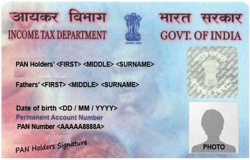

In [ ]:
# Display original image
original

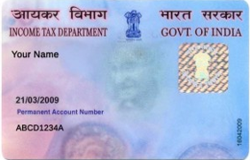

In [ ]:
# Display user given image
tampered

## User provided image which will be compared with PAN card.

In [ ]:
# load the two input images
original = cv2.imread('pan_card_tampering/image/original.png')
tampered = cv2.imread('pan_card_tampering/image/tampered.png')

In [ ]:
# Convert the images to grayscale
original_gray = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
tampered_gray = cv2.cvtColor(tampered, cv2.COLOR_BGR2GRAY)

Converting images into grayscale using opencv. Because in image processing many applications doesn't help us in identifying the important, edges of the coloured images also coloured images are bit complex to understand by machine beacuse they have 3 channel while grayscale has only 1 channel.  

# 4 use structural_similarity to find differences between 2 images

In [ ]:
# Compute the Structural Similarity Index (SSIM) between the two images, ensuring that the difference image is returned
(score, diff) = structural_similarity(original_gray, tampered_gray, full=True)
diff = (diff * 255).astype("uint8")
print("SSIM: {}".format(score))

SSIM: 0.31678790332739426


## imagen de parecido 
obsevamos que diff es una imagen que reasalta las partes que son diferentes en ambas imagenes :
- pixel negro: area de diferencia 
- pixel blanco: area de similaridad

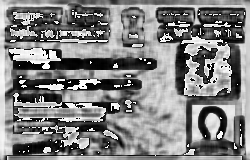

In [ ]:
cv2_imshow(diff)  

## Structural similarity index


Structural similarity index helps us to determine exactly where in terms of x,y coordinates location, the image differences are. Here, we are trying to find similarities between the original and tampered image. The lower the SSIM score lower is the similarity.

SSIM: 0.31678790332739426 means that the images have 31% of similarity


# 5 using threshold to find the place where the differences arre in the images 

## 5.1 uso de filtros con openCV
Uso de filtros de CV2:
https://www.geeksforgeeks.org/python-thresholding-techniques-using-opencv-set-1-simple-thresholding/

entender lo que significa un filtro de umbral, tesis:
Reconocimiento de caracteres mediante imágenes en contadores de gas en entornos reales

uso de filtros para mejorar imagenes 
https://stackoverflow.com/questions/37745519/use-pytesseract-ocr-to-recognize-text-from-an-image


# 5.2 contornos para encerrar objetos de imagenes 
un contorno es una serie de puntos que rodea cierta area de interes en una imagen, se puede usar para encerrar objetos en imagenes binarias (blanco y negro)


https://www.youtube.com/watch?v=YyRIvbLC99U

la funcion cv2.findContours nos regresara los contornos de los objetos de una imagen :

- jerarquia :demuestra la relacion con los contornos, algunos conrnos quedan sobre otros contornos.
- contornos : almacenados como vector de puntos, dependen del metod 

NOTA: si solo colocamos una variable en esta se guardaran en una lista los objetos(gerarquia, contornos )

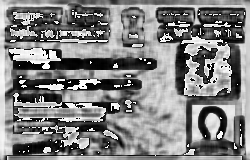

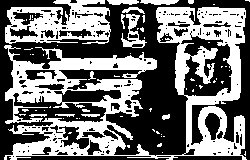

49


In [ ]:


# un umbral sirve para resaltar bordes de una imagen 
thresh = cv2.threshold(diff, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]

contornos = cv2.findContours(image = thresh.copy(), # black withe img
                                        mode = cv2.RETR_EXTERNAL, # modo de recuperacion de contorno
                                        method = cv2.CHAIN_APPROX_SIMPLE) # metodo de aproximacion (lo importante)



cv2_imshow(diff)
cv2_imshow(thresh) # visualizamos la imagen despues de resaltar los bordes 
# ahora lo que esta en negro es lo que es similar en ambas imagenes 
print(len(contornos[0])) # vemos cuantos contornos se crearon 




In [ ]:
#print(contornos[0][48])

vemos como cada contorno es una mascara que indica los contronos de los objetos detectados en la imagen thresh

In [ ]:
from time import sleep
import os
for a in range(len(contornos[0])):
  new_o = cv2.drawContours(image = original,
                         contours = contornos[0],
                         contourIdx = a, 
                         color= (0,255,0), # color del contorno 
                         thickness = 3) # grosor
  cv2_imshow(new_o)
  print(a )
  sleep(.5)
  #os.system('cls')




Here we are using the threshold function of computer vision which applies an adaptive threshold to the image which is stored in the form array. This function transforms the grayscale image into a binary image using a mathematical formula.

Find contours works on binary image and retrive the contours. This contours are a useful tool for shape analysis and recoginition. Grab contours grabs the appropriate value of the contours.

In [ ]:
# en el tutorial utilizan esta funcion pero no tiene mucha diferencia su uso asi que no lo usare
cnts = imutils.grab_contours(contornos) 
cv2_imshow(cnts[0][0])

print(cnts[0][0])

[[162 152]]


In [ ]:
original = cv2.imread('pan_card_tampering/image/original.png')

# loop over the contours
for c in contornos[0]:
    # applying contours on image
    # crea un rectangulo a cada uno de los 49 objetos detectados en los contornos de los objetos
    (x, y, w, h) = cv2.boundingRect(c) 
    # imprimimos el rectangulo en la imagen
    cv2.rectangle(original, (x, y), (x + w, y + h), (0, 0, 255), 2)
    cv2.rectangle(tampered, (x, y), (x + w, y + h), (0, 0, 255), 2)




Bounding rectangle helps in finding the ratio of width to height of bounding rectangle of the object. We compute the bounding box of the contour and then draw the bounding box on both input images to represent where the two images are different or not.

Original Format Image


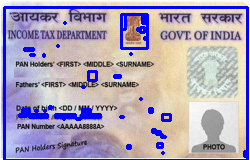

In [ ]:
#Diplay original image with contour
print('Original Format Image')
Image.fromarray(original)

Tampered Image


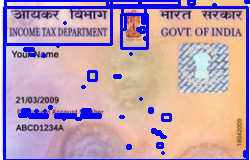

In [ ]:
#Diplay tampered image with contour
print('Tampered Image')
Image.fromarray(tampered)

Different Image


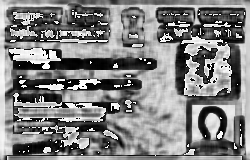

In [ ]:
#Diplay difference image with black
print('Different Image')
Image.fromarray(diff)

Threshold Image


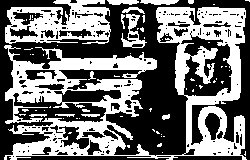

In [ ]:
#Display threshold image with white
print('Threshold Image')
Image.fromarray(thresh)

# Summary 

Finding out structural similarity of the images helped us in finding the difference or similarity in the shape of the images. Similarly, finding out the threshold and contours based on those threshold for the images converted into grayscale binary also helped us in shape analysis and recognition. 

As, our SSIM is ~31.2% we can say that the image user provided is fake or tampered.

Finally we visualized the differences and similarities between the images using by displaying the images with contours, difference and threshold.  

# scope 

This project can be used in different organizations where customers or users need to provide any kind of id in order to get themselves verified. The organization can use this project to find out whether the ID is original or fake. Similarly this can be used for any type of ID like adhar, voter id, etc.